#### Basemap visulization 
We use the python package cartopy to visualize the basemap, and the basemap of cartopy is from: https://www.naturalearthdata.com/downloads/  


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from glob import glob
from pyogrio import read_dataframe   ### faster when reading vector data by using geopandas
from utils.utils import add_basemap


In [2]:
proj = ccrs.PlateCarree()

1. hydrology basin

In [3]:
dir_hydrobasin = 'data/regions/HydroBasin-lev02'
paths_basins = glob(dir_hydrobasin+'/*.gpkg')


In [8]:
basins_gpd = [read_dataframe(path) for path in paths_basins]
basins_gpd = pd.concat(basins_gpd, ignore_index=True)
print(len(basins_gpd))
basins_gpd.head(2)


62


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,5020000010,0,5020000010,5020000010,0.0,0.0,714372.3,714372.3,51,0,1,0,1,"MULTIPOLYGON (((110.63194 -6.57917, 110.62583 ..."
1,5020015660,0,5020015660,5020015660,0.0,0.0,1250625.9,1250625.9,52,0,1,0,2,"MULTIPOLYGON (((122.77778 -4.04167, 122.77439 ..."


<GeoAxes: >

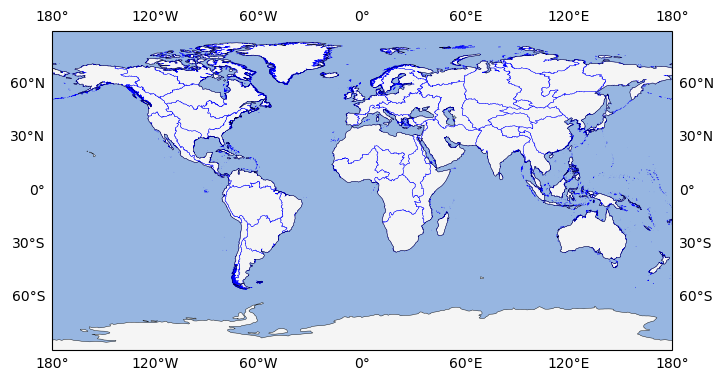

In [5]:

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection=proj)
add_basemap(ax=ax)
basins_gpd.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=0.2)


2. glacier region

In [6]:
path_gla_region = 'data/regions/GNT-GlacReg-2023/gtng_202307_o1regions.gpkg'
gla_regions_gpd = read_dataframe(path_gla_region)
gla_regions_gpd.head()


,o1region,full_name,long_code,geometry
0,01,Alaska,01_alaska,"MULTIPOLYGON (((-133.00000 54.50000, -134.0000..."
1,02,Western Canada and USA,02_western_canada_usa,"MULTIPOLYGON (((-133.00000 54.50000, -132.0000..."
2,03,Arctic Canada North,03_arctic_canada_north,"MULTIPOLYGON (((-125.00000 74.00000, -125.0000..."
3,04,Arctic Canada South,04_arctic_canada_south,"MULTIPOLYGON (((-90.00000 74.00000, -89.00000 ..."
4,05,Greenland Periphery,05_greenland_periphery,"MULTIPOLYGON (((-75.00000 77.00000, -74.73000 ..."


<GeoAxes: >

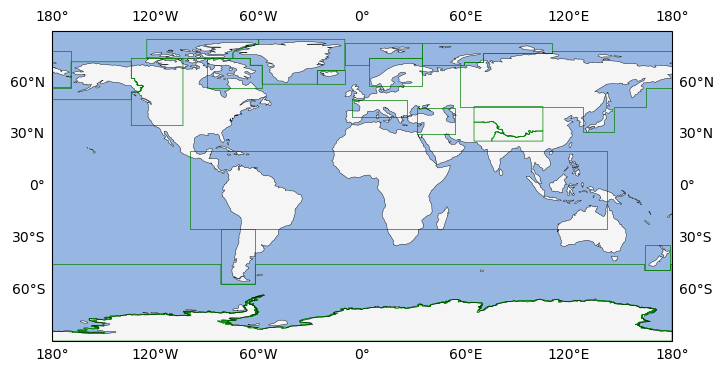

In [7]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection=proj)
add_basemap(ax=ax)
gla_regions_gpd.plot(ax=ax, facecolor='none', edgecolor='green', linewidth=0.5)

